<a href="https://colab.research.google.com/github/RalphAldhous/Hello-world/blob/main/CLIP_Starter_Pack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title License
'''CLIP Starter Pack: It's Literally A Bunch Of Tutorials<br>
Copyright (C) 2021 Bearsharktopus Studios

This program is free software: you can redistribute it and/or modify
it under the terms of the <b>GNU Affero General Public License</b> as
published by the Free Software Foundation, either version 3 of the
License, or (at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.'''

# **CLIP Starter Pack**

Hello! I've been playing with CLIP for a while, enough to develop two amusing applications for it: [CLIPokemon](https://colab.research.google.com/drive/1KX63ZcQHF_pKlh4aKQwgEaZe7UZrfGIw) and [CLIPTionary Attack](https://colab.research.google.com/drive/1OkY1aifTzEzRqbPEGBMpaA70SZ9jFpOy). It's really not super complicated to use for its most basic function (assigning words to images and rating their probabilities), but code can be intimidating, so here is a very baby-steps implementation of three (so far) CLIP demos to help onboard you into the Cult of Multimodality!

-[@ai_curio](https://twitter.com/ai_curio)

## <b>HOW TO USE</b>
### 1. Upload an image into your filestructure over to the left (click on the folder icon, then the page with up arrow icon).
### 2. Put the image's filename in "image" down under `Parameters`.
### 3. Go to "Runtime" and then "Restart & Run All".
### 4. Watch the magic, then pry open the code so you can make it do what YOU want!

<br><br>Need help? Got demo suggestions? Feel free to pop your face into the [Zoetrope Central Spoke](https://href.li/?https://discord.gg/QPxEB8fcrh) for assistance.

# Imports + Downloads

In [ ]:
#@markdown
#!nvidia-smi
%cd /content/
!git clone https://github.com/openai/CLIP.gi
%cd /content/CLIP/
!pip install ftfy
!pip install tqdm
from tqdm import trange
import imageio
import torchvision
from IPython import display
from IPython.display import clear_output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
import clip
!pip install kornia
import kornia
import torch
import torch.nn.functional as F
from PIL import Image
from pprint import pprint
import random

clip.available_models()

#RN50x4
#ViT-B/32

import numpy as np

# Load the model
perceptor, preprocess = clip.load('ViT-B/32', jit=True) # usually use vit
perceptor = perceptor.eval()

%cd /content/
!git clone https://github.com/first20hours/google-10000-english

clear_output()

# Parameters

In [ ]:
# @markdown Just upload your file to Google Colab and then put the filename here.<br>Then press the play icon to the left of this text.
image = "turtlesandwich.jpg" #@param
image = '/content/' + image

# Definitions

If you're trying to learn a little bit more about CLIP, here's where you want to look! This contains the GUTS.

In [ ]:
# All this code has been commented for your convenience and education.
# Let's break down each line!

# This defines the device we're using. torch.cuda.is_available() checks for a GPU.
# If we have a GPU, we use the GPU (fast!). If not, we use the CPU (slow...)
device = "cuda" if torch.cuda.is_available() else "cpu"
# Then, we load CLIP's model into the "model" variable
# and its preprocessor into the "preprocess" variable
# The model is its brains, the preprocessor does the image futzing.
model, preprocess = clip.load("ViT-B/16", device=device)

# First, this opens your image into the computer with Image.open(image)
# And stores that in a variable called "im"
im = Image.open(image)
# Then, it uses the preprocessor to press it into what's called a "tensor"
# which is a form of multi-dimensional array/list, and sends it to either
# CUDA or your CPU, depending on what's available.
image_to_rate = preprocess(im).unsqueeze(0).to(device)

# This defines the function we use for the barebones CLIPstuff: "rate_words"
# Rate words takes a list(/array) as input and returns another list as output.
def rate_words(input_list):
  # We use CLIP to "tokenize" your input list, which basically turns the list
  # into something that CLIP can process with, since it can't use raw text.
  text = clip.tokenize(input_list).to(device)

  # PyTorch & Tensorflow are the two main movers of machine learning in Python.
  # We're asking PyTorch (Torchvision, technically) to operate without a gradient.
  with torch.no_grad():
      # This gets the scoring of the model on the input image.
      logits_per_image, logits_per_text = model(image_to_rate, text)
      # And this takes the cosine similarity scores and returns
      # the probability of the image being assigned to each text.
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()

  # Now we have our list of probabilities, and we store it in probs_list
  probs_list = probs.tolist()[0]
  # The "zip" function presses both lists against each other like a zipper
  # It goes and creates a new "zip object" made out of the components paired off.
  input_probs_zip = zip(input_list, probs_list)
  # Now, a "zip object" is NOT a list. So we need to turn it into one.
  # We start by defining this empty list
  input_probs_list = []
  # Then we go through each value in the zip object...
  for i in input_probs_zip:
    # and put it in the new list...
    input_probs_list.append(i)
  # And then we sort the list! Using this funky lambda function, we can sort
  # a multi-dimensional list by its inner values - in this case, the second
  # value of each element in the list, which is its probability. This puts
  # the biggest values at the front of the list and the smallest at the bottom.
  input_probs_list.sort(key=lambda x:x[1], reverse=True)

  # Then, we return that list!
  return input_probs_list




# Here it is without the comments
def rate_words(input_list):
  text = clip.tokenize(input_list).to(device)

  with torch.no_grad():
      logits_per_image, logits_per_text = model(image_to_rate, text)
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()

  probs_list = probs.tolist()[0]
  input_probs_zip = zip(input_list, probs_list)
  input_probs_list = []
  for i in input_probs_zip:
    input_probs_list.append(i)
  input_probs_list.sort(key=lambda x:x[1], reverse=True)

  return input_probs_list

# Nice and compact!

# Processing

CREEPY OR WET DEMO
'Is it creepy? Is it wet?'
"Our verdict: it's creepy (94.2%)."

ALCHEMY DEMO
'This image is hot (93.2%) and dry (93.2%). Its nature is Fire'

TOP TEN ENGLISH WORDS DEMO - PLEASE HOLD TIGHT
[['dinner', '30.63%'],
 ['gourmet', '13.59%'],
 ['budget', '7.5%'],
 ['served', '2.89%'],
 ['italian', '2.29%'],
 ['dining', '2.18%'],
 ['matrix', '1.98%'],
 ['table', '1.06%'],
 ['ideal', '0.67%'],
 ['plate', '0.6%']]



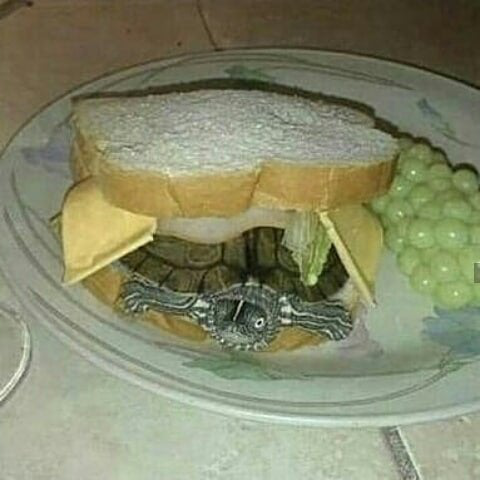

In [ ]:
# @markdown Just press the play button to the left of this text! This is where the magic happens.
# @markdown <br>There's code inside here, if you wish to **learn**...
# Getting the image in case you changed it...
im = Image.open(image)
image_to_rate = preprocess(im).unsqueeze(0).to(device)

# Hello! It's the tutorial again. Ready?
# What we do here is the simplest possible invocation of CLIP's word rating.
# We give it two choices to pick from. Creepy, or wet? We put them in a list.
# Then, we call rate_words on that list and store the result in "result"
cw_result=rate_words(["creepy","wet"])

# Then, the rest is just formatting!
print("CREEPY OR WET DEMO")
pprint("Is it creepy? Is it wet?")
pprint("Our verdict: it's "+cw_result[0][0]+" ("+str(int(cw_result[0][1]*1000)/10)+"%).")
print()

# Creepy/wet code graciously donated to this tutorial by @pankendev on Twitter.



# Alright, ready to do something a little more complicated?
# Let's use the ancient principles of alchemy to analyze an image.

# First, let's rate two separate lists and store them in separate variables
# Along with a third dummy value that it should never be able to reach.
a1_result=rate_words(["dry","wet"])
a2_result=rate_words(["hot","cold"])
a3_result = "Error!"

# Then, we just use an if-else chain to define the end result.
if a1_result[0][0] == "dry" and a2_result[0][0] == "hot":
  a3_result = "Fire"
elif a1_result[0][0] == "wet" and a2_result[0][0] == "hot":
  a3_result = "Air"
elif a1_result[0][0] == "dry" and a2_result[0][0] == "cold":
  a3_result = "Earth"
elif a1_result[0][0] == "wet" and a2_result[0][0] == "cold":
  a3_result = "Water"

# Print!
print("ALCHEMY DEMO")
pprint("This image is "+a2_result[0][0]+" ("+str(int(a2_result[0][1]*1000)/10)+"%) and "+a1_result[0][0]+" ("+str(int(a1_result[0][1]*1000)/10)+"%). Its nature is "+a3_result)
print()



# Let's step the complication up a little bit more.
# When you ran the imports up above, you also downloaded a list of the
# most commonly used English words. We're gonna rank that!
# This is similar to my CLIPTionary Attack notebook, but less robust.

# First, we're opening up that list and storing it in "list_of_words"
# Specifically, we're getting the medium length words.
file = open("/content/google-10000-english/google-10000-english-usa-no-swears-medium.txt", "r")
list_of_words = file.read().splitlines()
# Always close your files when you're done with them! 
file.close()

print("TOP TEN ENGLISH WORDS DEMO - PLEASE HOLD TIGHT")
# Yes, we're rating 2000 of them at once. It will take a little bit.
# The original version of this notebook rated all of them at once but...
# But most GPUs can't handle that and I forgot everyone doesn't have pro+.
cd_result = rate_words(list_of_words[0:2000])
# We're only getting the top 10.
cd_topten = []
for i in range(10):
  cd_topten.append([cd_result[i][0], str(int(cd_result[i][1]*10000)/100)+"%"])
pprint(cd_topten)
print()



# MORE DEMOS TO COME... MAYBE, IF I CAN THINK OF THEM.
# Display the image so we remember what we're looking at!
im